In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
learning_rate = 0.01
epochs = 200

In [3]:
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

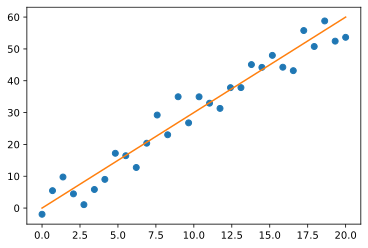

In [4]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

In [29]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='weights')
b = tf.Variable(np.random.randn(), name='bias')

In [30]:
pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [31]:
init = tf.global_variables_initializer()

epoch: 0000 cost=40.1662 weight=2.3489 bias=-1.1994
epoch: 0020 cost=8.5482 weight=2.9728 bias=-1.0608
epoch: 0040 cost=8.5158 weight=2.9676 bias=-0.9800
epoch: 0060 cost=8.4867 weight=2.9627 bias=-0.9032
epoch: 0080 cost=8.4607 weight=2.9580 bias=-0.8303
epoch: 0100 cost=8.4373 weight=2.9535 bias=-0.7612
epoch: 0120 cost=8.4162 weight=2.9493 bias=-0.6956
epoch: 0140 cost=8.3974 weight=2.9453 bias=-0.6333
epoch: 0160 cost=8.3805 weight=2.9415 bias=-0.5741
epoch: 0180 cost=8.3653 weight=2.9379 bias=-0.5180


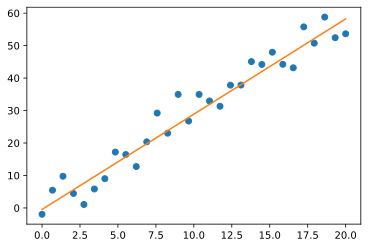

In [32]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if not epoch % 20:
            c = sess.run(cost, feed_dict={X: train_x, Y: train_y})
            w = sess.run(W)
            B = sess.run(b)
            print(f'epoch: {epoch:04d} cost={c:.4f} weight={w:.4f} bias={B:.4f}')
    
    weight = sess.run(W)
    bias = sess.run(b)
    
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)
    plt.show()